# Exercise for Graph V: Automatic Higher or Lower Game
This notebook implements an automatic higher/lower guessing game using a graph.

In [26]:
from typing import TypedDict, List,Dict
from langgraph.graph import StateGraph, END
import random

In [27]:
class GameState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    answer: int
    last_hint: str

In [28]:
def setup(state: GameState) -> GameState:
    state['answer'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'] = []
    state['attempts'] = 0
    state['last_hint'] = ''
    return state

In [29]:
def guess(state: GameState) -> GameState:
    # Always guess the middle of the current bounds
    guess_num = (state['lower_bound'] + state['upper_bound']) // 2
    state['guesses'].append(guess_num)
    state['attempts'] += 1
    return state

In [30]:
def hint_node(state: GameState) -> GameState:
    last_guess = state['guesses'][-1]
    if last_guess == state['answer']:
        state['last_hint'] = 'correct'
    elif last_guess < state['answer']:
        state['last_hint'] = 'higher'
        state['lower_bound'] = last_guess + 1
    else:
        state['last_hint'] = 'lower'
        state['upper_bound'] = last_guess - 1
    return state

In [31]:
def should_continue(state: GameState) -> str:
    if state['last_hint'] == 'correct':
        print(f'Guessed correctly in {state['attempts']} attempts! Guesses: {state['guesses']}')
        return 'stop'
    elif state['attempts'] >= 7:
        print(f'Max attempts reached. Answer was {state['answer']}. Guesses: {state['guesses']}')
        return 'stop'
    else:
        return 'continue'

In [32]:
graph = StateGraph(GameState)
graph.add_node('setup', setup)
graph.add_node('guess', guess)
graph.add_node('continue', hint_node)
graph.add_edge('setup', 'guess')
graph.add_edge('guess', 'continue')
graph.add_conditional_edges('continue', should_continue, {
    'continue': 'guess',
    'stop': END,
})
graph.set_entry_point('setup')
app = graph.compile()

In [33]:
# Run the game
initial_state = {
    'player_name': 'Student',
    'guesses': [],
    'attempts': 0,
    'lower_bound': 1,
    'upper_bound': 20,
    'answer': 0,
    'last_hint': ''
}
app.invoke(initial_state)

Guessed correctly in 3 attempts! Guesses: [10, 15, 18]


{'player_name': 'Student',
 'guesses': [10, 15, 18],
 'attempts': 3,
 'lower_bound': 16,
 'upper_bound': 20,
 'answer': 18,
 'last_hint': 'correct'}

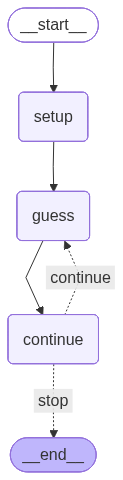

In [34]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))